<a href="https://colab.research.google.com/github/shaficse/Visualization-of-the-output-of-each-CNN-layers-for-input-image/blob/main/visualization_output_of_cnn_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Convolutional neural networks are highly effective for image classification and recognition tasks, as they employ a variety of filters in each layer to learn features from the training images. The features that are learned at each convolutional layer tend to vary significantly. It has been observed that the earlier layers tend to capture low-level features such as edges, orientation, and colors in the image. As the number of layers increases, the CNN is able to capture more high-level features, which aid in distinguishing between different classes of images. To better understand how convolutional neural networks learn spatial and temporal dependencies in images, it is possible to visualize the different features that are captured at each layer.





In [1]:
#ignore this section and use your local path if you use your owndata from local storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#ignore this section and use your local path if you use your owndata from local storage
%cd drive/My Drive/

/content/drive/My Drive


To experiment the visualization of the output of CNN layers, We will consider a Binary Classification (dog and cat image classification) Task where we build a convolutional neural network and then add a classifier on top of the network.

In [3]:
# Step-1: Loading a dataset and preprocessing the data

from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory("training-data/cat_dog/train", target_size=(150,150), batch_size=20, class_mode="binary")
validation_generator = val_data_gen.flow_from_directory("training-data/cat_dog/test", target_size=(150,150), batch_size=20, class_mode="binary")

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [4]:
#step-2: Define the model architecture
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPool2D( (2,2) ) )

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.summary()  # paramer of each layer =  weight [32(num of filters)*3*3(filter size)* 3(channel)] + baise[num of filters]

# output shape ( 150-3+1, 150-3+1, 32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
#step-3: Compiling and training the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss ="binary_crossentropy", optimizer = RMSprop(learning_rate = 0.001), metrics =['accuracy'])

In [10]:
history = model.fit_generator(train_generator, \
                              steps_per_epoch=1, epochs=5, validation_data=validation_generator, validation_steps= 1)



Epoch 1/5


<ipython-input-10-56ee26a8b063>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, \


1/1 [==============================] - 0s 355ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 278ms/step - loss: 0.6850 - accuracy: 0.5000 - val_loss: 0.6979 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 255ms/step - loss: 0.6717 - accuracy: 1.0000 - val_loss: 0.7342 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 100ms/step - loss: 0.6837 - accuracy: 0.5000 - val_loss: 0.7250 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 312ms/step - loss: 0.7151 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000


(1, 150, 150, 3)


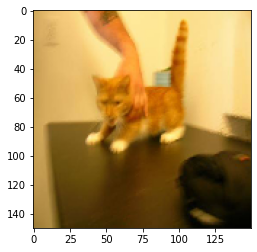

In [11]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
import numpy as np

# Pre-processing the image
img = tf.keras.utils.load_img("training-data/cat_dog/test/cat/cat.0.jpg", target_size = (150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

# Print image tensor shape
print(img_tensor.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()


1/1 [==============================] - 0s 82ms/step


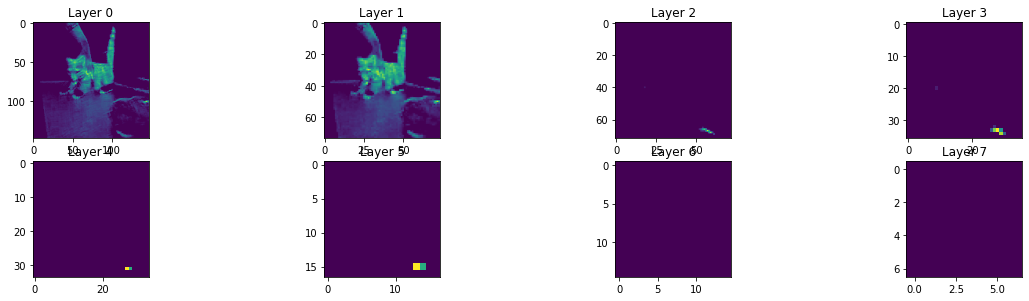

In [13]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

fig = plt.figure(figsize=(20,20))
for i, layer_act in enumerate( activations):
    plt.subplot(8,4,i+1)
    plt.title(f'Layer {i}')
    plt.imshow(activations[i][0, :, :,0], cmap='viridis')

plt.show()

In [31]:
# activations[1][0, :, :,1] == activations[0]
print(activations[7].shape)
print(activations[7][0, :, :,0].shape)

(1, 7, 7, 128)
(7, 7)


In [27]:
# Funciton to visualize the ouput o each layers with a range of channel
def visualization_CNN_layer(activations, layer, no_channel, plot_x,plot_y):
  plt.figure(figsize=(20,20))
  for i in range(no_channel):
    plt.title(f'Channel{i} ')
    plt.subplot(plot_x,plot_y,i+1)
    plt.imshow(activations[layer][0,:,:,i], cmap='viridis')
  plt.show()

32


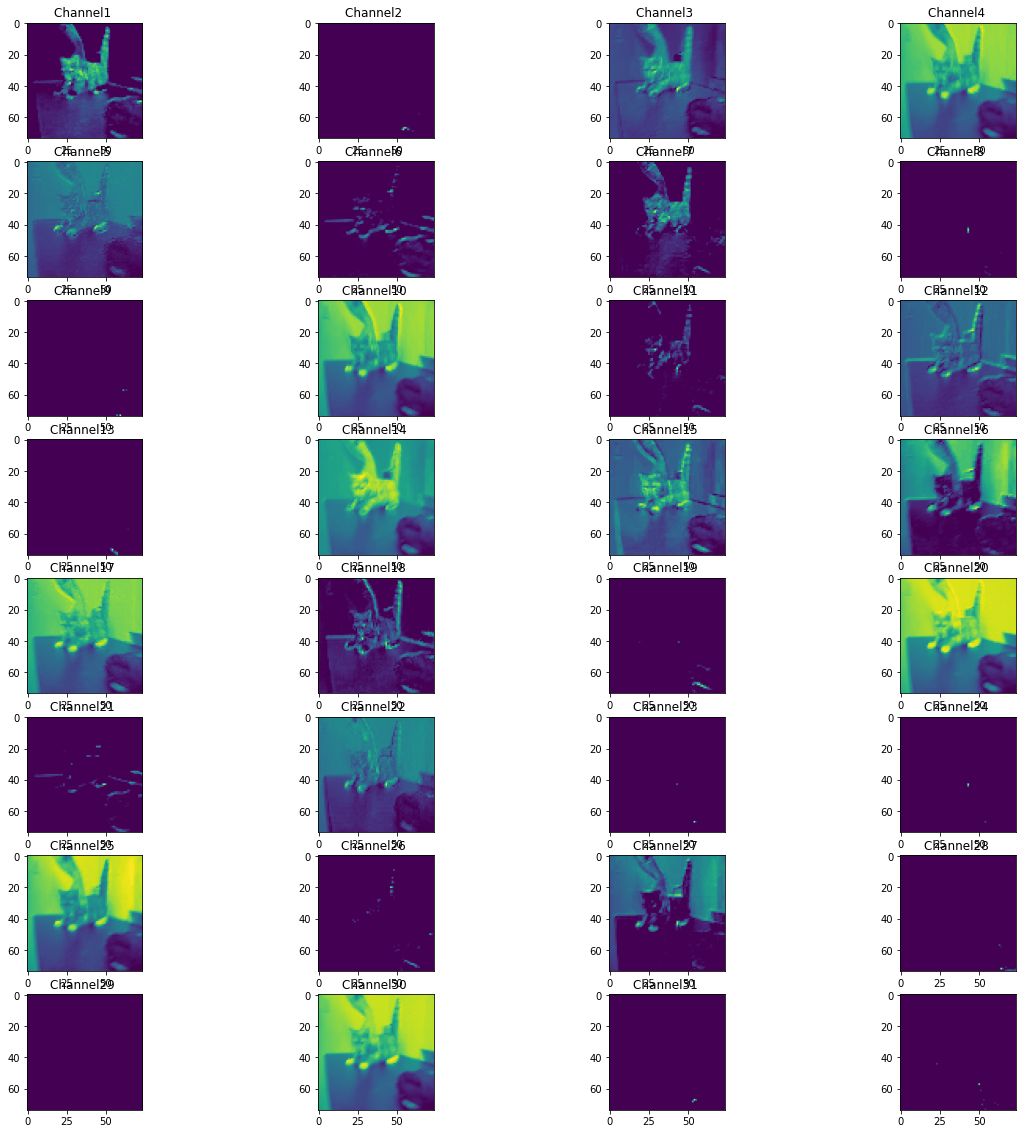

In [28]:
#First Layer
layer = 1
plot_x = 8
plot_y = 4
_,_, _,  no_channel  = activations[layer].shape
print(no_channel)
visualization_CNN_layer(activations, layer, no_channel,plot_x,plot_y)